# Prediction of a drug molecule properties

## Introduction


This notebook is dedicated to understand and the visualization the data


## I. Import Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import gridspec
%matplotlib inline
import hub.src.config as config
import hub.src.main as main
from sklearn.metrics import  accuracy_score, confusion_matrix
from keras.models import load_model

Model evaluation completed successfully.


## II - Exploratory Data Analysis

Let's start creating statistics and visualizations on my dataset to identify good columns for modeling, potential data quality issues and anticipate potential feature transformations necessary...

### 1 Import Data

In [2]:
X,y,df = main.read_data(data_path=config.path_single, col_smiles='smiles', col_target=config.COL_TARGET_SINGLE)
print(df.columns)
df.head()

Index(['P1', 'mol_id', 'smiles'], dtype='object')


,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


### 2 Missing Values and syntax error

In [3]:
# Print the shape of the data
print("Type of features:")
print(df.dtypes)
print("Shape of data:")
print(df.shape)
print("Descriptive statistics of numerical features:")
print(df.describe())

Type of features:
P1         int64
mol_id    object
smiles    object
dtype: object
Shape of data:
(4999, 3)
Descriptive statistics of numerical features:
                P1
count  4999.000000
mean      0.821764
std       0.382749
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000


In [4]:
# Now let's check to see if there are any NaN or missing values
# Percent missing values per columns
(df.isna().sum()/df.shape[0])*100

P1        0.0
mol_id    0.0
smiles    0.0
dtype: float64

No missing data ...

In [5]:
# Duplicates after handling missing values
df[df.duplicated()].shape[0]

0

No duplicated entries

In [6]:
# Check unique values in variables
print("Number of unique molecule ID in the dataset:", df['mol_id'].nunique())
print("Number of unique Smiles in the dataset:", df['smiles'].nunique())
print("Number of unique P1 values in the dataset:", df['P1'].nunique())

Number of unique molecule ID in the dataset: 4999
Number of unique Smiles in the dataset: 4999
Number of unique P1 values in the dataset: 2


In [7]:
# Target variable values distribution
df['P1'].value_counts()*100/df.shape[0]

P1
1    82.176435
0    17.823565
Name: count, dtype: float64

 17.8% only of the entries are considered of property P1 = 0 and 82.2% of property P1 = 1. That could lead to a problem and Accuracy is misleading for imbalanced data. i will use F1-score to have a better measure of the model's performance.

### 3 Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_9452\3096339180.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(P1)


Text(0, 0.5, 'Distribution')

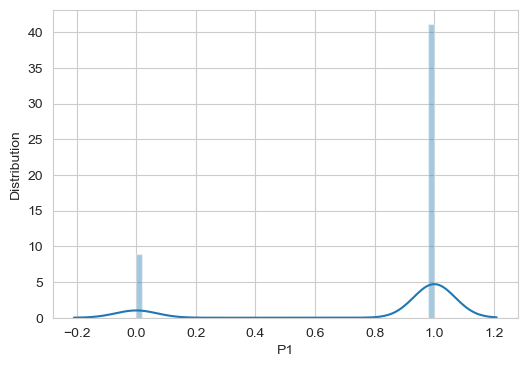

In [8]:
# Univariate visualization
# Distribution of average_seconds_played
P1 = [df['P1'].values]
plt.figure(figsize=(6,4))
sns.distplot(P1)
plt.xlabel('P1')
plt.ylabel('Distribution')